# Importing Data and Dealing with Missing Values

In [25]:
# Importing data
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cbook as cb
import scipy.stats as scp
import numpy as np
import sweetviz as sv
import ydata_profiling as yd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo

df = pd.read_csv(filepath_or_buffer="./data/processed.cleveland.data");
df.columns = ["age","sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"];

In [26]:
# Identifying invalid values
df.nunique() 
# ca can only have values 0, 1, 2, 3
# thal can only have values 3, 6, 7
# should convert num to be 0, 1 only

df['ca'].unique()
df['thal'].unique()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [27]:
# Identifying missing values
df.isnull().sum()
# Non-found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [28]:
# Dropping rows with invalid values
to_drop = df[df.isin(["?"]).any(axis=1)].index
df.drop(index=list(to_drop), inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [29]:
# Converting 'num' to a boolean (0, 1)
num_dict = {
    0: '',
    1: True,
    2: True,
    3: True,
    4: True,
}
for key in num_dict:
    df.loc[df["num"] == key, 'num'] = num_dict[key]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,True
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,True
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,True
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,True
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,True
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,True


In [30]:
# Checking types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  num       296 non-null    object 
dtypes: float64(11), object(3)
memory usage: 34.7+ KB


In [31]:
# Giving appropriate types to columns
df = df.astype({
    "age": "float64",
    "sex": "category", 
    "trestbps": "float64",
    "chol": "float64",
    "cp": "category", 
    "fbs": "category", 
    "restecg": "category", 
    "thalach": "float64",
    "exang": "category", 
    "oldpeak": "float64",
    "slope": "category", 
    "ca": "category", 
    "thal": "category", 
    "num": "bool"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       296 non-null    float64 
 1   sex       296 non-null    category
 2   cp        296 non-null    category
 3   trestbps  296 non-null    float64 
 4   chol      296 non-null    float64 
 5   fbs       296 non-null    category
 6   restecg   296 non-null    category
 7   thalach   296 non-null    float64 
 8   exang     296 non-null    category
 9   oldpeak   296 non-null    float64 
 10  slope     296 non-null    category
 11  ca        296 non-null    category
 12  thal      296 non-null    category
 13  num       296 non-null    bool    
dtypes: bool(1), category(8), float64(5)
memory usage: 17.6 KB


# Normalizations and Transformations

In [32]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.513514,131.648649,247.398649,149.597973,1.051351
std,9.051631,17.775956,52.078915,22.980401,1.165841
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.250000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [33]:
# Normalizing
# numerics = df.select_dtypes(include=["float64"])
# nndf=(numerics - numerics.mean())/numerics.std() # Mean normalization
# for col in nndf.columns:
#     df[col] = nndf[col]
# df.describe()

In [34]:
# Checking appropriate transformations
def test_transformations(df, name):
    old_df = df.copy(deep=True)

    temp = scp.yeojohnson(df[name])[0]
    sb.histplot(data=temp, bins=30, kde=True)
    sb.histplot(data=old_df, x=name, bins=30, kde=True)
    plt.show()

    temp = 1/df[name]
    sb.histplot(data=temp, bins=30, kde=True)
    sb.histplot(data=old_df, x=name, bins=30, kde=True)
    plt.show()

    temp = np.sqrt(df[name])
    sb.histplot(data=temp, bins=30, kde=True)
    sb.histplot(data=old_df, x=name, bins=30, kde=True)
    plt.show()

    temp = np.log(df[name])
    sb.histplot(data=temp, bins=30, kde=True)
    sb.histplot(data=old_df, x=name, bins=30, kde=True)
    plt.show()

In [35]:
# Transforming
def apply_transformation(df, name, new_list):
    df.drop(labels=name, axis=1, inplace=True)
    df[name] = new_list
    return df
    

# Applying transformations to variables
# apply_transformation(df, "age", list(scp.yeojohnson(df["age"])[0]))
# apply_transformation(df, "trestbps", list(1/df["trestbps"]))
# apply_transformation(df, "chol", list(scp.yeojohnson(df["chol"])[0]))
# apply_transformation(df, "thalach", list(scp.yeojohnson(df["thalach"])[0]))
# apply_transformation(df, "oldpeak", list(scp.yeojohnson(df["oldpeak"])[0]))


# Removing Outliers

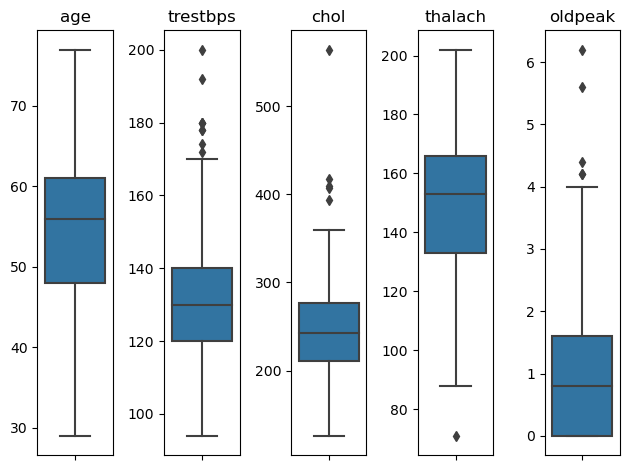

In [36]:
# Before removing outliers
numerics = df.select_dtypes(include=["float64"])
stats = cb.boxplot_stats(X=numerics)
col_list = list(numerics.columns)
fig, axes = plt.subplots(1, len(col_list))
for i, col in enumerate(col_list):
    ax = sb.boxplot(y=df[col], ax=axes.flatten()[i])
    ax.title.set_text(col)
    ax.set(ylabel=None)
fig.tight_layout()
plt.show()

In [37]:
numerics = df.select_dtypes(include=["float64"])
stats = cb.boxplot_stats(X=numerics)
col_list = list(numerics.columns)
init_row_count = df.shape[0]
for i in range(len(list(numerics.columns))):
    for outlier_val in stats[i]['fliers']:
        to_drop = df[df[col_list[i]] == outlier_val].index
        df.drop(index=list(to_drop), inplace=True, axis=0)
fin_row_count = df.shape[0]
print(f'Removed {init_row_count - fin_row_count} rows with outliers')

Removed 19 rows with outliers


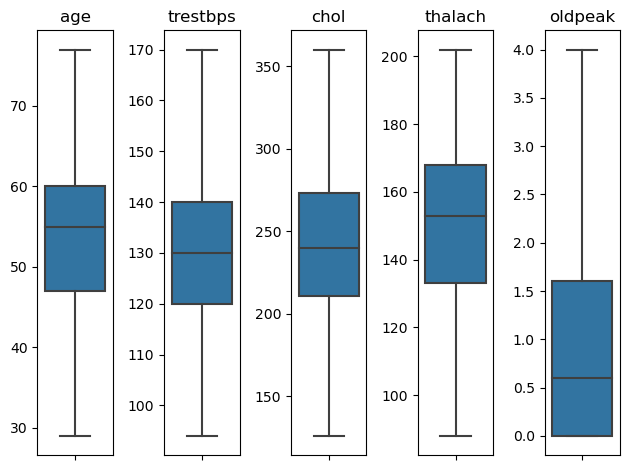

In [38]:
# After removing boxplots
fig, axes = plt.subplots(1, len(col_list))
for i, col in enumerate(col_list):
    ax = sb.boxplot(y=df[col], ax=axes.flatten()[i])
    ax.title.set_text(col)
    ax.set(ylabel=None)
fig.tight_layout()
plt.show()


# Exploratory Data Analysis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       277 non-null    float64 
 1   sex       277 non-null    category
 2   cp        277 non-null    category
 3   trestbps  277 non-null    float64 
 4   chol      277 non-null    float64 
 5   fbs       277 non-null    category
 6   restecg   277 non-null    category
 7   thalach   277 non-null    float64 
 8   exang     277 non-null    category
 9   oldpeak   277 non-null    float64 
 10  slope     277 non-null    category
 11  ca        277 non-null    category
 12  thal      277 non-null    category
 13  num       277 non-null    bool    
dtypes: bool(1), category(8), float64(5)
memory usage: 16.6 KB


In [40]:
# Sweetviz report 
result = sv.analyze(df, target_feat="num")
result.show_html(filepath="sweetviz_report.html")

c:\Users\Tharindu\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Tharindu\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\Tharindu\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\Tharindu\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
c:\Users\Tharindu\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\Tharindu\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\Tharindu\anaconda3\lib\site-packages\swee

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


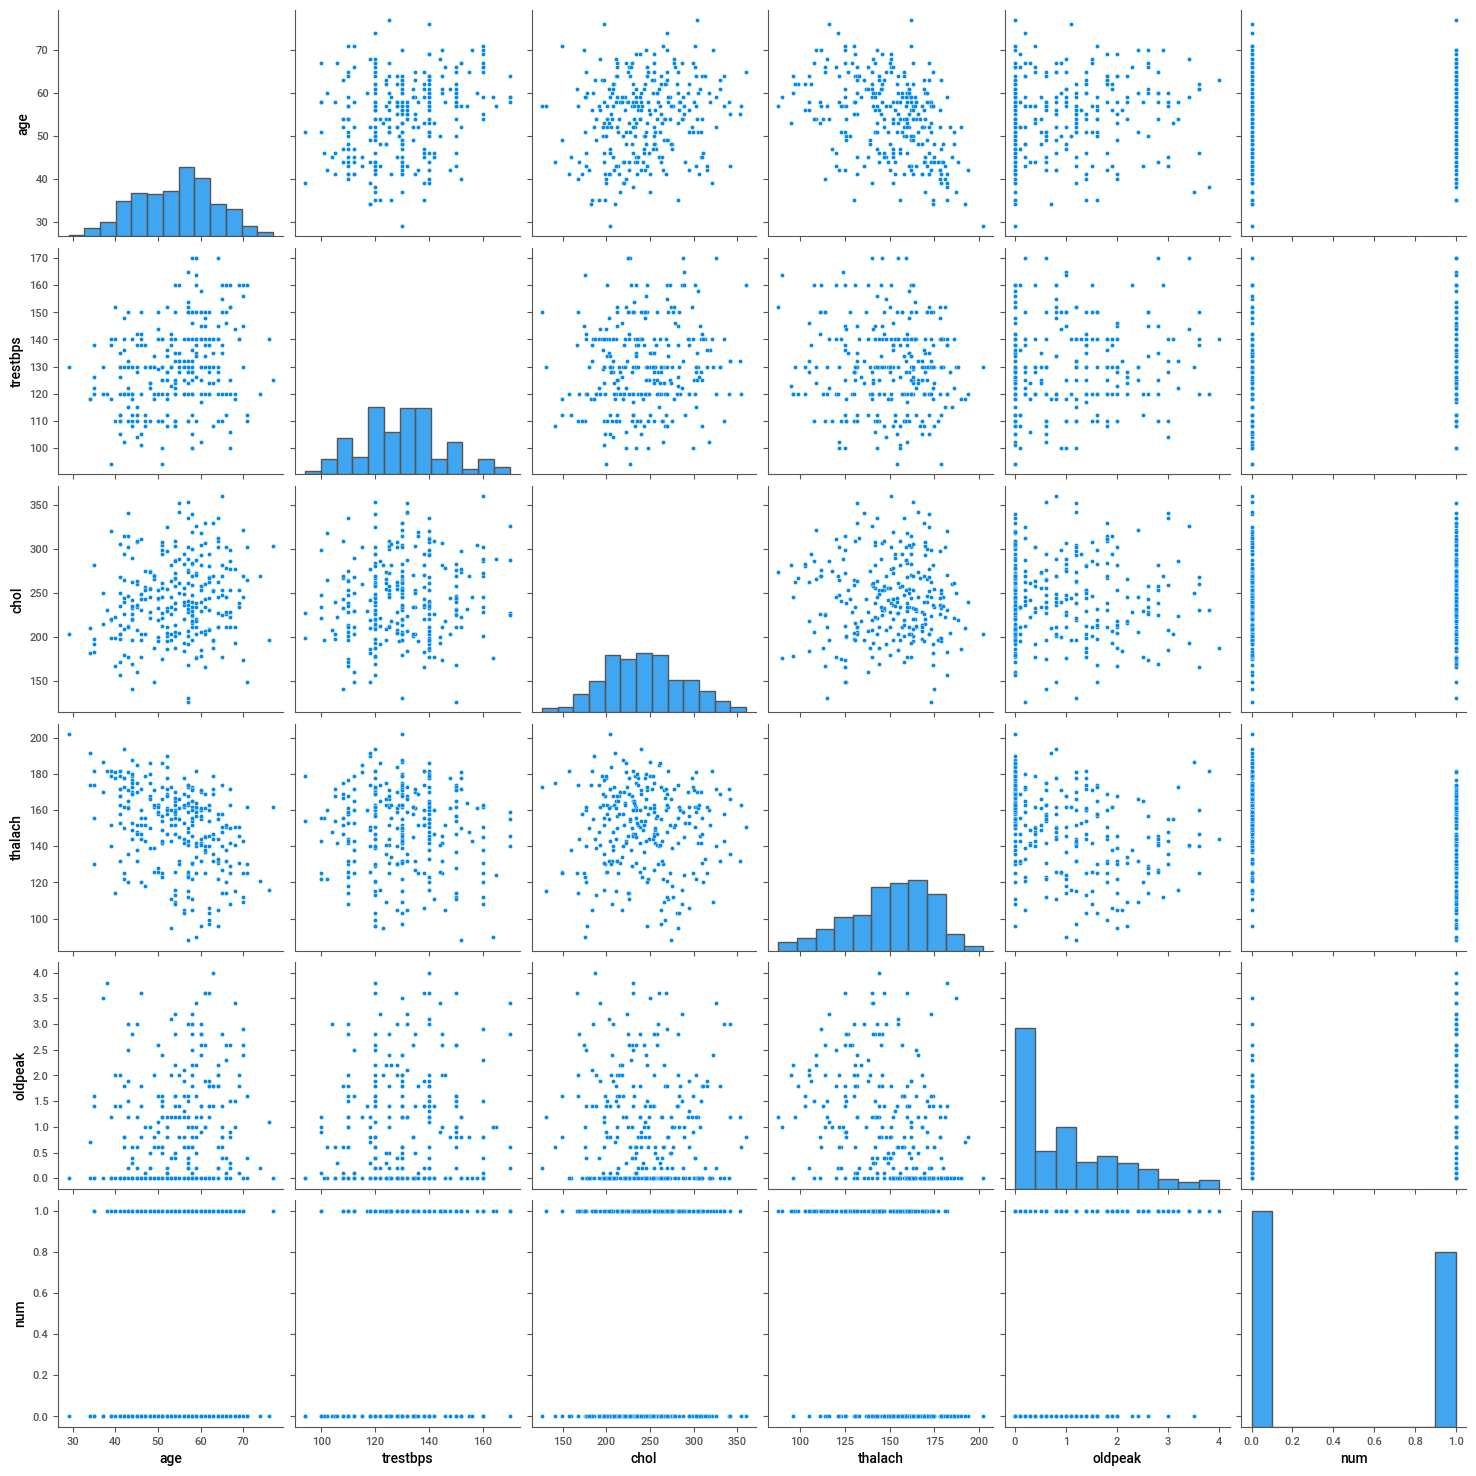

In [41]:
# Pair plot
sb.pairplot(data=df)

In [42]:
# Pandas report
report = yd.ProfileReport(df);
report.to_file("ydata_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

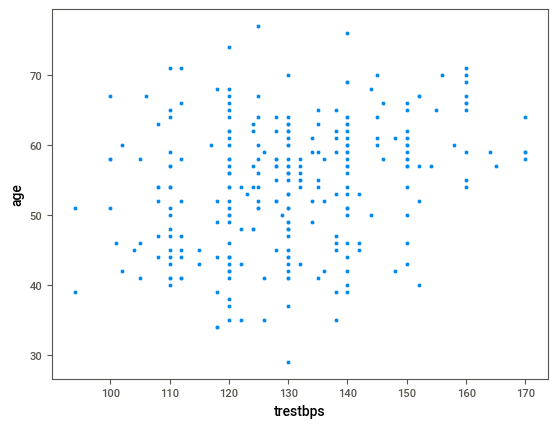

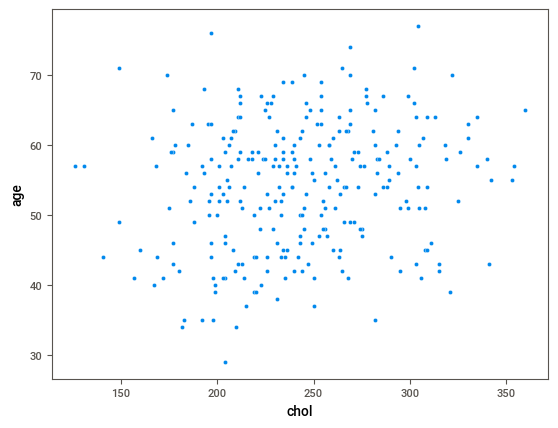

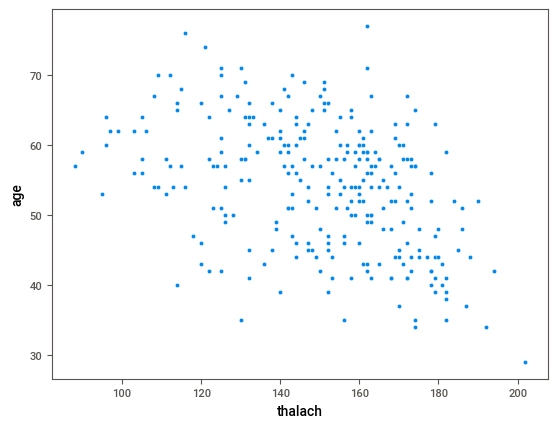

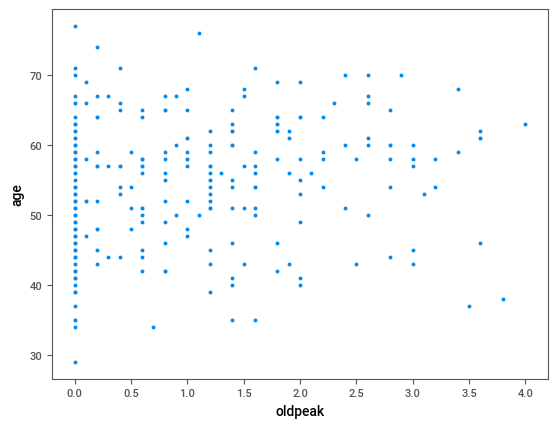

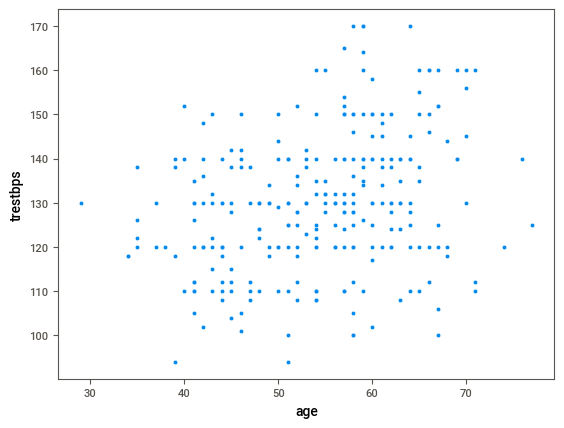

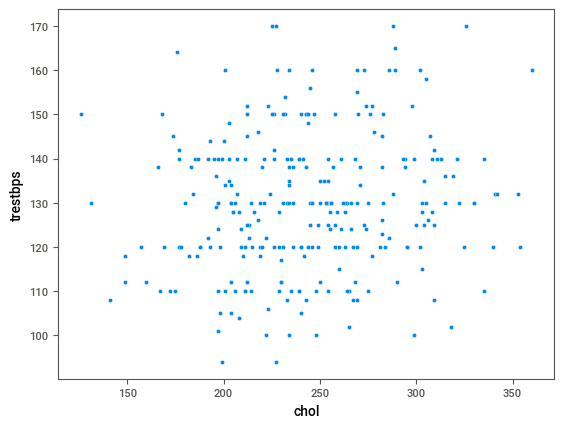

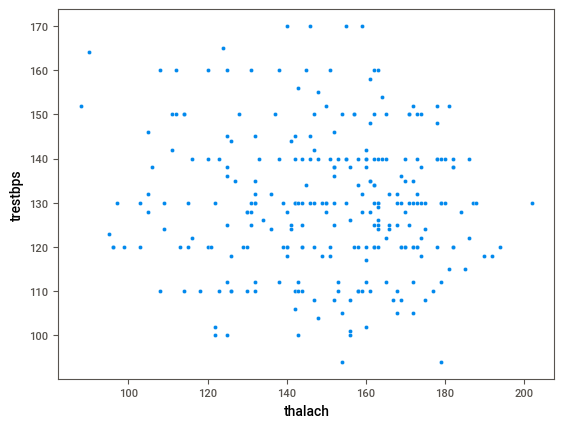

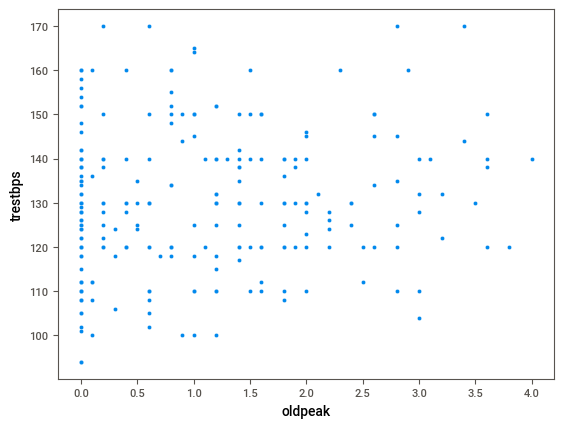

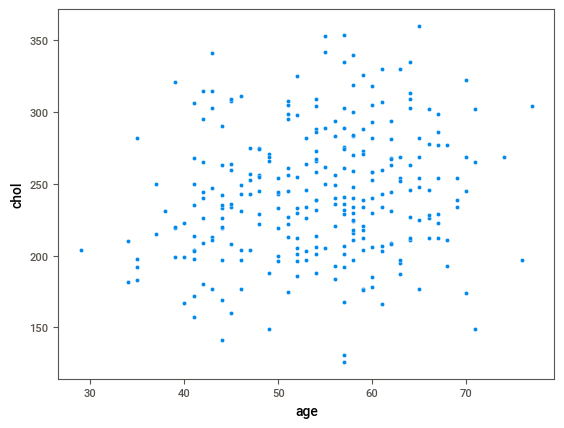

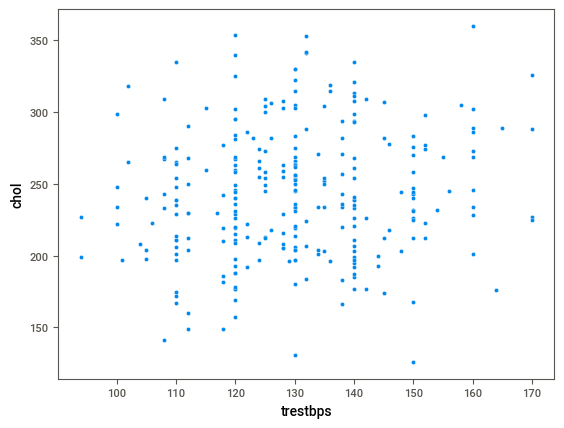

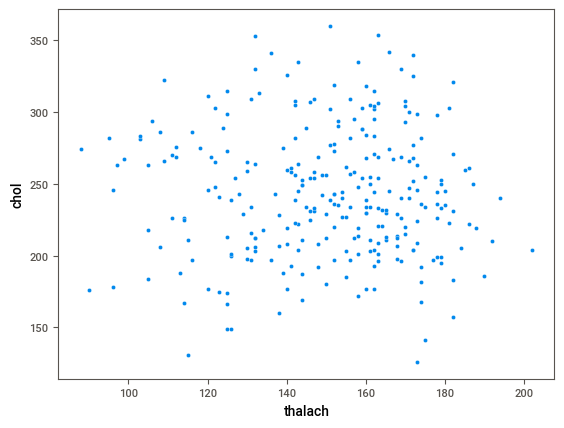

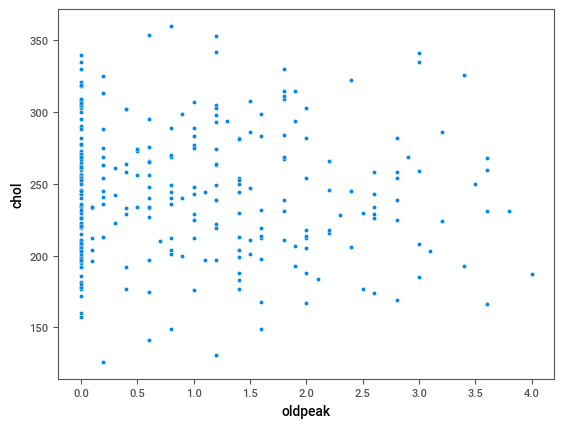

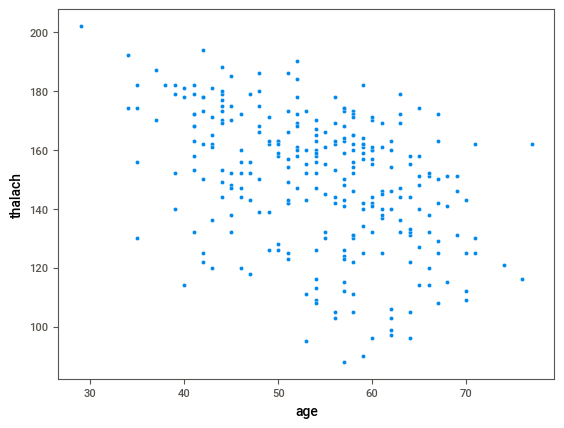

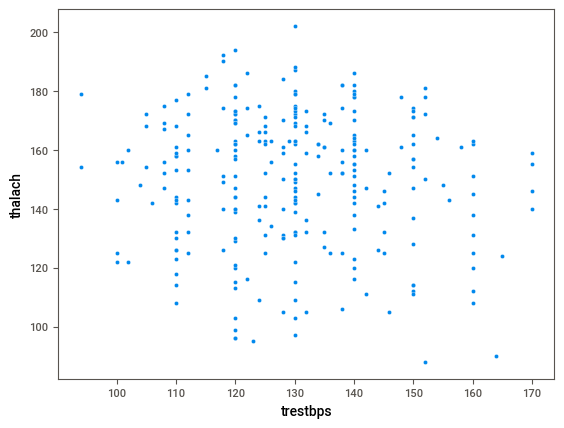

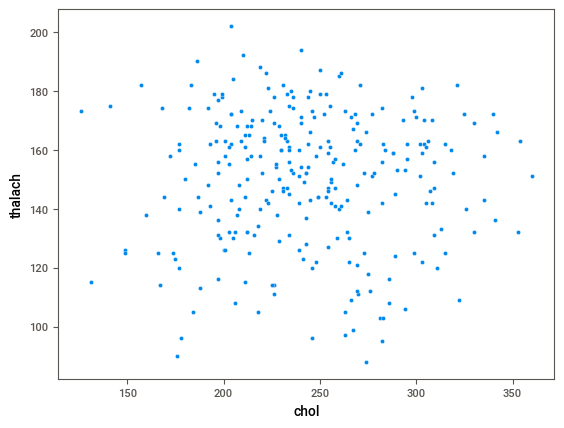

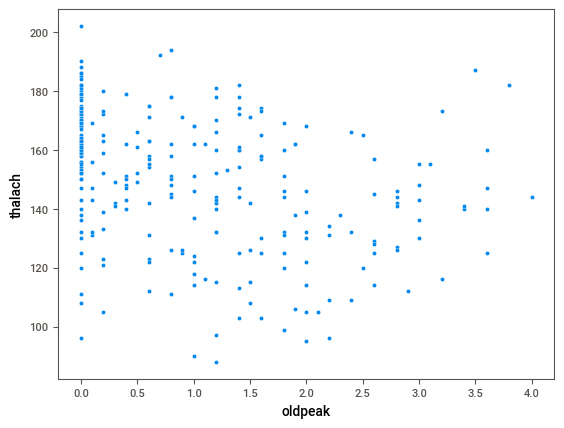

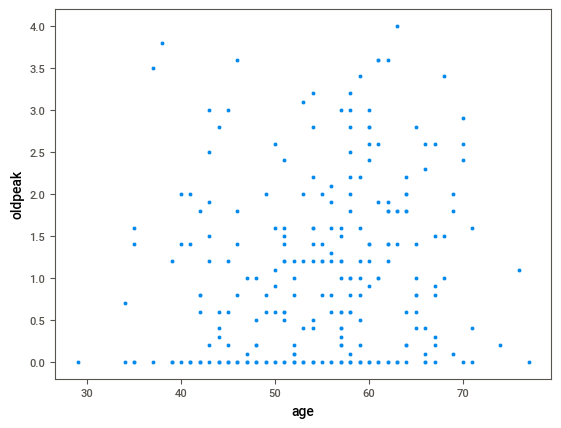

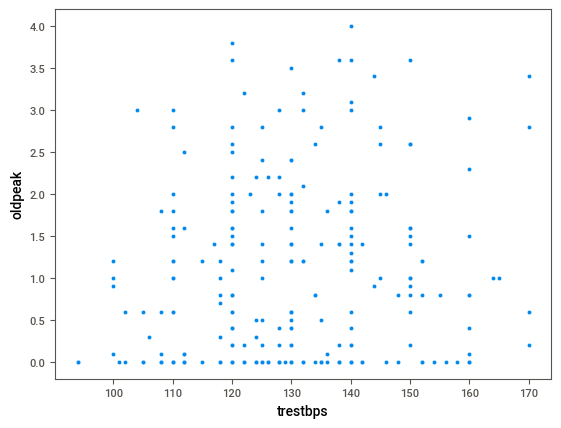

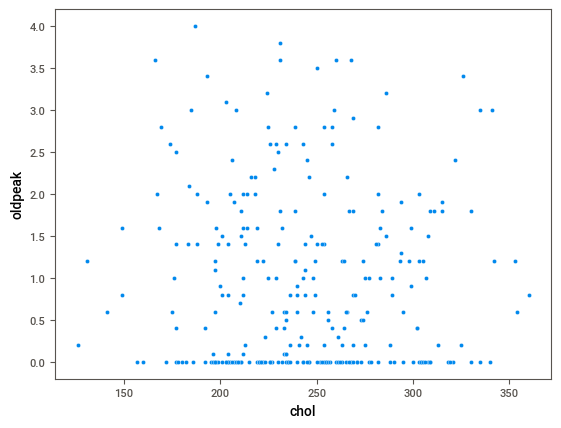

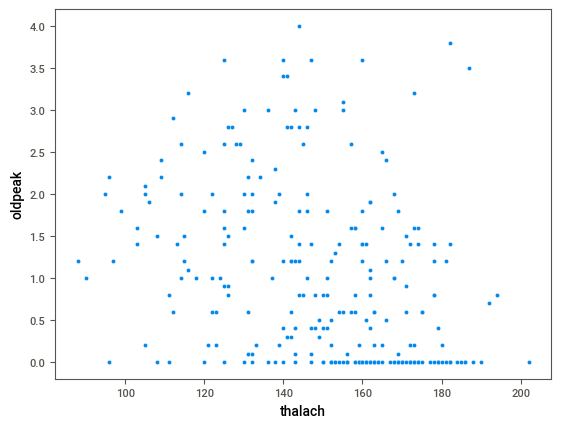

In [43]:
# Generate scatter plots for numerical independent variables
numerics = df.select_dtypes(include=["float64"])
for col1 in numerics.columns:
    for col2 in numerics.columns:
        if (col1 != col2):
            sb.scatterplot(data=df, y=col1, x=col2)
            plt.show()

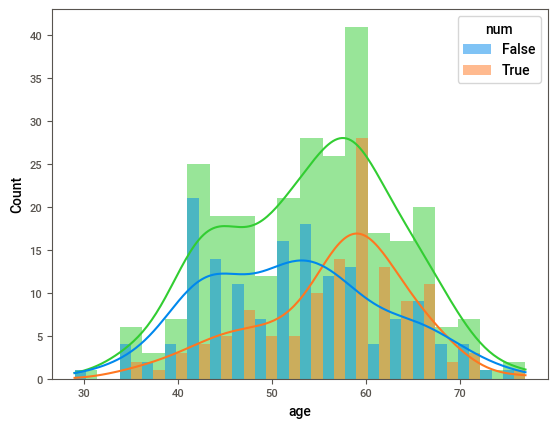

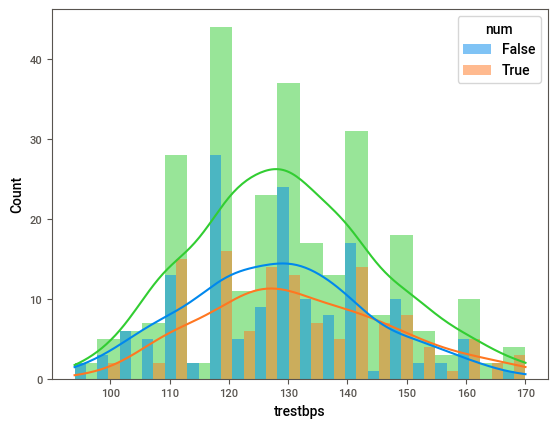

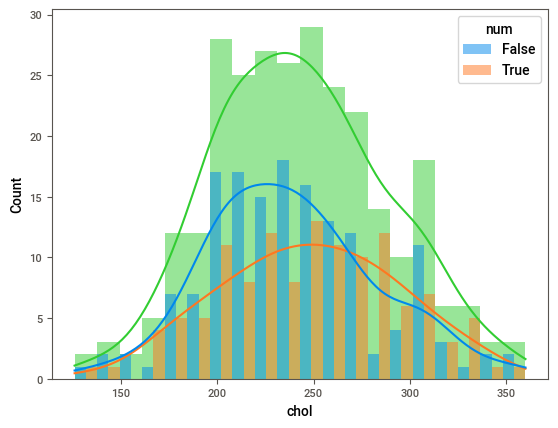

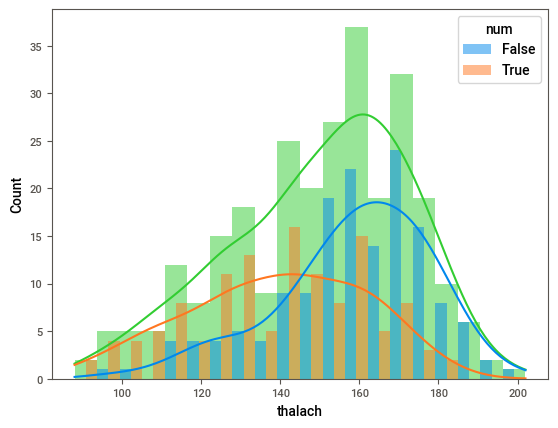

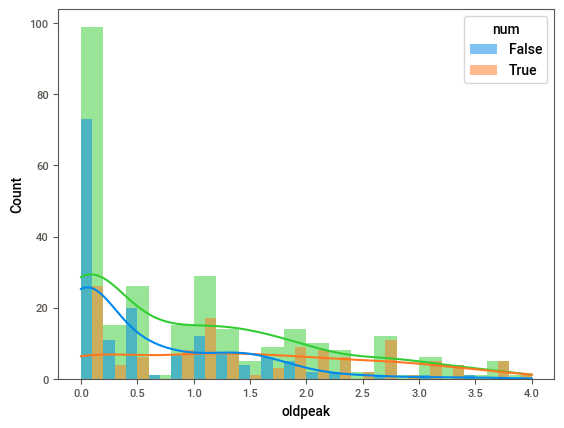

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


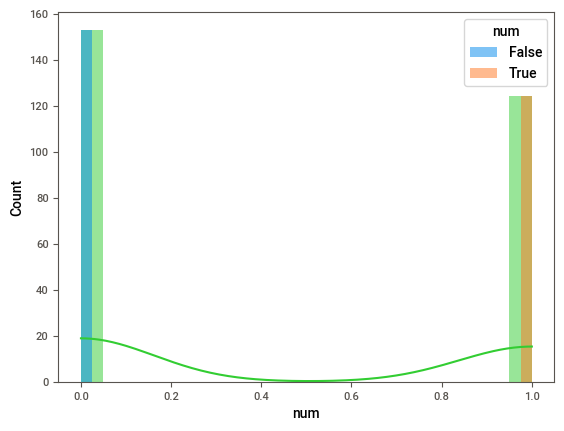

In [44]:
import matplotlib.colors as mcolors

# Generate histograms for continuos variables
cont_cols = df.select_dtypes(include=["float64", "boolean"]);
ndf = df.copy(deep=True)[list(cont_cols)]
plt.rcParams['patch.edgecolor'] = 'none'
for i, col in enumerate(cont_cols):
    sb.histplot(data=df, x=col, multiple="dodge", bins=20, kde=True, color=mcolors.CSS4_COLORS["limegreen"])
    sb.histplot(data=df, x=col, hue="num", multiple="dodge", bins=20, kde=True)
    plt.show()

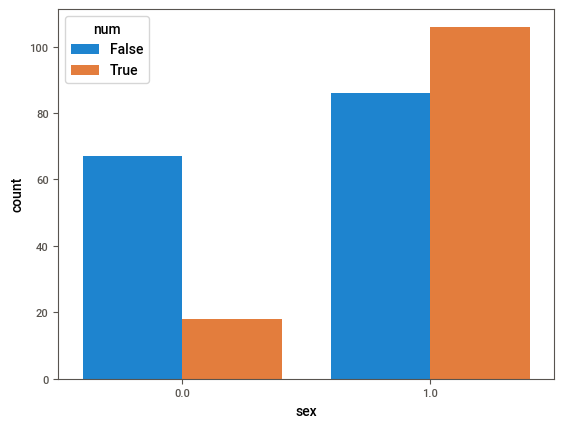

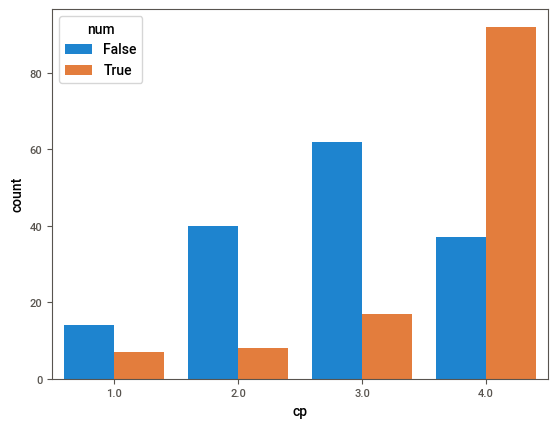

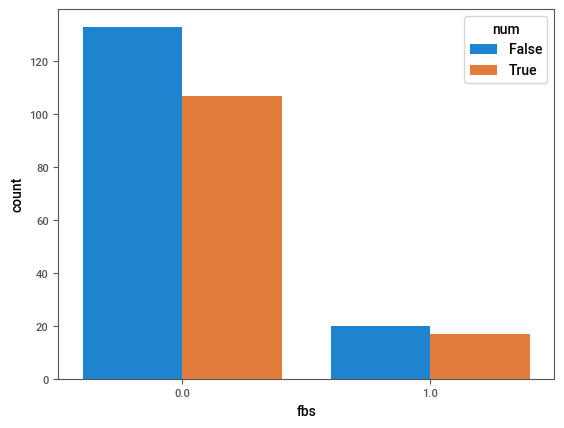

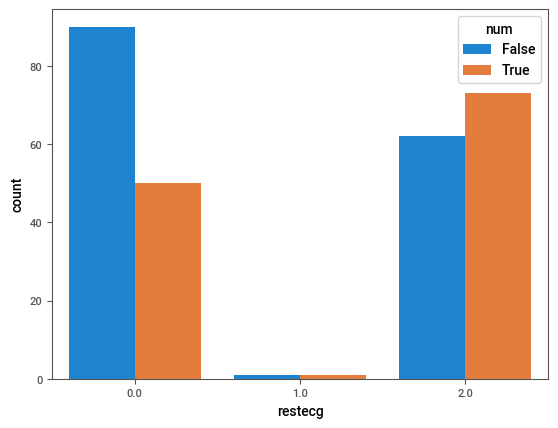

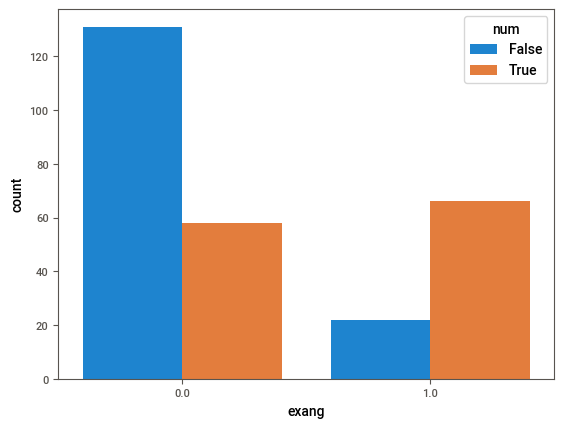

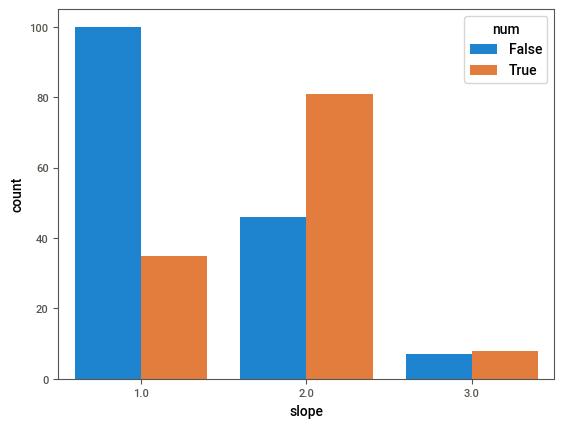

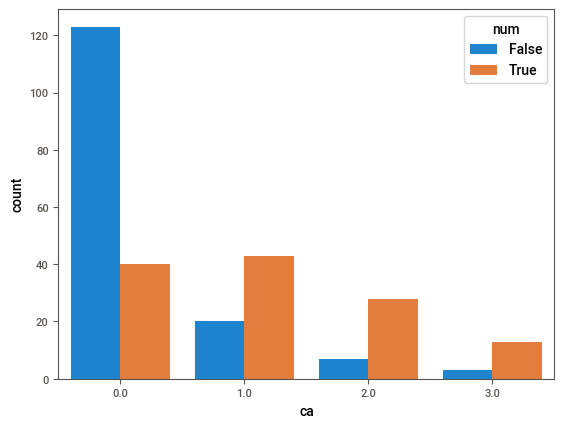

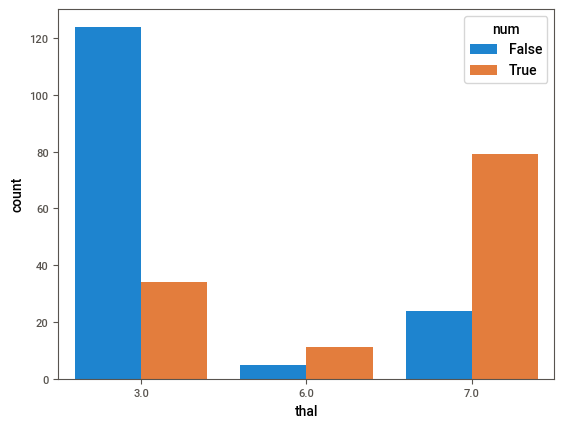

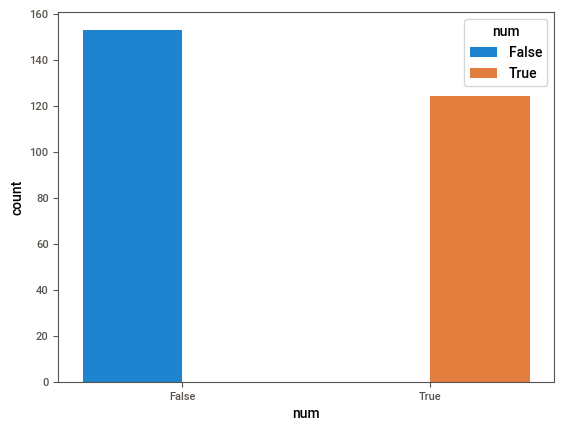

In [45]:
# Generate histograms for categorical variables
cat_cols = df.select_dtypes(include=["category", "boolean"]);
ndf = df.copy(deep=True)[list(cat_cols)]
for i, col in enumerate(cat_cols):
    sb.countplot(data=df, x=col, hue="num")
    plt.show()

# Checking Logistics Regression Compatibility
Referenced from 
- https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290
- https://learn.g2.com/logistic-regression

In [46]:
# Assumption - Linearity of independent variables and log-odds
# Define continuous variables
ndf = df.copy(deep=True)
continuous_var = list(ndf.select_dtypes(include=["float64"]).drop(labels="oldpeak", axis=1))
# # # Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)
for var in continuous_var:
    ndf[f'{var}:Log_{var}'] = ndf[var].apply(lambda x: x * np.log(x))
# # # Keep columns related to continuous variables
cols_to_keep = continuous_var + ndf.columns.tolist()[-len(continuous_var):]

# # # Redefining variables to include interaction terms
X_lt = ndf[cols_to_keep]

# # # Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)

# # # Building model and fit the data (using statsmodel's Logit)
logit_results = sm.GLM(df[['num']], X_lt_constant, family=sm.families.Binomial()).fit()

# # # Display summary results
logit_results.summary()

# If we consider p <= 0.05 to be statistically significant. All pass. Therefore all are linearly related.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    num   No. Observations:                  277
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -158.36
Date:                Fri, 02 Jun 2023   Deviance:                       316.72
Time:                        15:59:38   Pearson chi2:                     277.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2070
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       1.0824      0.836      1.294      0.196      -0.557       2.722
trestbps                  0.5139      0.684      0.751      0.453      -0.827       1.855
chol                     -0.0020      0.164     -0.012      0.990      -0.324       0.320
thalach                   0.4286      0.469      0.914      0.361      -0.491       1.348
age:Log_age              -0.2157      0.168     -1.287      0.198      -0.544       0.113
trestbps:Log_trestbps    -0.0852      0.116     -0.732      0.464      -0.313       0.143
chol:Log_chol             0.0010      0.025      0.040      0.968      -0.049       0.051
thalach:Log_thalach      -0.0794      0.079     -1.007      0.314      -0.234       0.075
const                   -30.2689     21.892     -1.383      0.167     -73.176      12.638
=========================================================================================
"""

In [47]:
# Assumption - Little to no multi-collinearity between independent variables
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    numerics = df[list(df.select_dtypes(include=["float64"]))]
    vif = pd.DataFrame()
    vif["variables"] = numerics.columns
    vif["VIF"] = [smo.variance_inflation_factor(numerics, i) for i in range(numerics.shape[1])]
    return(vif)

calc_vif(df)
# If values here exceed 5 or 10; Assumption is not satisfied
# age, trestbps, chol and thalach all exceed 10. So its not satified.
# oldpeak only has moderate multi-collinearity.

,variables,VIF
0,age,37.670899
1,trestbps,64.962379
2,chol,29.609890
3,thalach,30.784962
4,oldpeak,2.104720


In [48]:

for col in df.columns.to_list()[1:]:
    print(f'{col}: {df[col].value_counts().min()}')
        
# Getting total number of observations
print(len(df))

sex: 85
cp: 21
trestbps: 1
chol: 1
fbs: 37
restecg: 2
thalach: 1
exang: 88
oldpeak: 1
slope: 15
ca: 16
thal: 16
num: 124
277
